### Data Visualizations of 2022 Business Data - Scatter plots 

In [3]:
import simulation as sim 
import marketmaker as mm 
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
#reading in dataset that uses marketmaker function that cleans the dataset and locates just the grocery stores
grocery22 = mm.supermarket_generator('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv','costco_2022.csv','2022_Business_Academic_QCQ_supercenters.csv')
supermarket22 = mm.group(grocery22)

# Store Locations of the Top grocery stores in the US

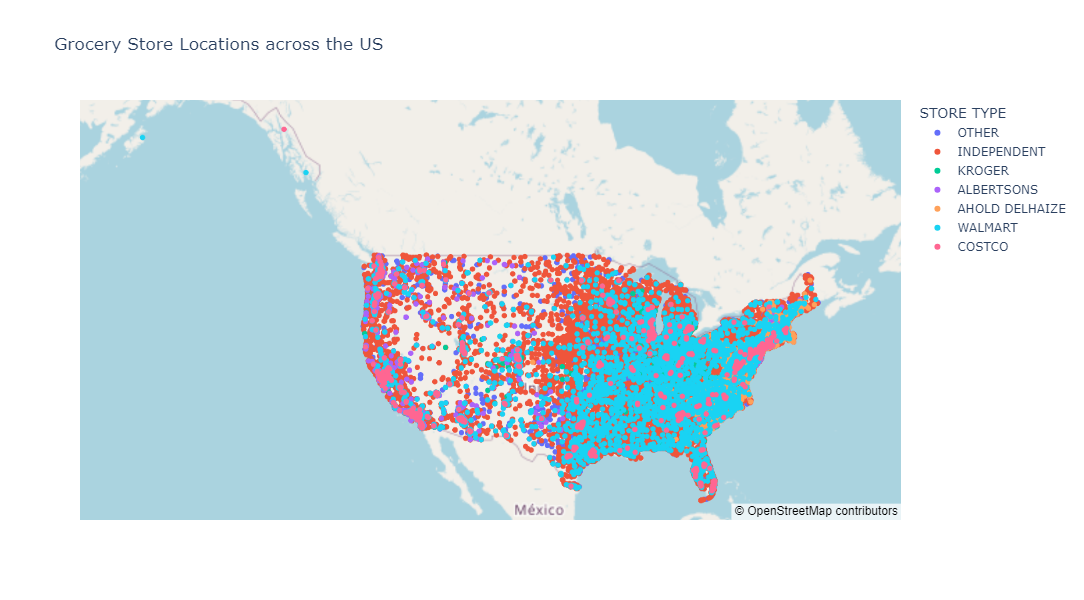

In [11]:
#df is the dataframe you would use, latitude is the latitude metric, longitude is the longitude metric, variable is the column you want to colour by,
#timelapse is the duration over which you want to observe your data, maptitle is the title you want for your map.
def scatterMapBox(df,latitude,longitude,variable,timelapse,maptitle):
    fig = px.scatter_mapbox(df, lat=latitude, lon=longitude, color=variable, 
                            color_continuous_scale=["black", "purple", "red" ],
                            animation_frame= timelapse, size_max=30, height = 600,
                            width = 1000, title= maptitle, mapbox_style="open-street-map")
    return fig


figure = scatterMapBox(supermarket22,'LATITUDE','LONGITUDE','STORE TYPE','ARCHIVE VERSION YEAR','Grocery Store Locations across the US')
figure.show()

## Geographic overlap of the two brands - Alberstons and Kroger

# BEFORE MERGER

In [6]:
#locating only Kroger and Albertsons stores 
store_kr_alb= supermarket22.loc[(supermarket22['STORE TYPE'] == 'ALBERTSONS') | (supermarket22['STORE TYPE'] == 'KROGER')]
store_kr_alb.head()

COMPANY       ADDRESS LINE 1           CITY STATE  ZIPCODE    ZIP4  \
3        KROGER       1600 S OHIO ST   MARTINSVILLE    IN    46151  3317.0   
4   FOOD 4 LESS   2420 COTTONWOOD DR      EL CENTRO    CA    92243  1604.0   
5        KROGER    301 E MCKINLEY RD         OTTAWA    IL    61350  4805.0   
41       RALPHS  42150 WASHINGTON ST  BERMUDA DUNES    CA    92203  9611.0   
49         VONS    78271 HIGHWAY 111      LA QUINTA    CA    92253  2063.0   

    COUNTY CODE  AREA CODE  IDCODE LOCATION EMPLOYEE SIZE CODE  \
3         109.0        765       2                           F   
4          25.0        760       2                           E   
5          99.0        815       2                           E   
41         65.0        760       2                           E   
49         65.0        760       2                           D   

   LOCATION SALES VOLUME CODE  PRIMARY SIC CODE SIC6_DESCRIPTIONS  \
3                           G            541105    GROCERS-RETAIL   
4                           F            541105    GROCERS-RETAIL   
5                           F            541105    GROCERS-RETAIL   
41                          G            541105    GROCERS-RETAIL   
49                          F            541105    GROCERS-RETAIL   

    PRIMARY NAICS CODE                                NAICS8 DESCRIPTIONS  \
3           44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
4           44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
5           44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
41          44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
49          44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   

    SIC CODE          SIC6_DESCRIPTIONS (SIC)  SIC CODE 1  \
3        NaN                              NaN         NaN   
4        NaN                              NaN         NaN   
5        NaN                              NaN         NaN   
41  554101.0  SERVICE STATIONS-GASOLINE & OIL    591205.0   
49  546102.0                    BAKERS-RETAIL    599201.0   

   SIC6_DESCRIPTIONS (SIC1)  SIC CODE 2 SIC6_DESCRIPTIONS(SIC2)  SIC CODE 3  \
3                       NaN         NaN                     NaN         NaN   
4                       NaN         NaN                     NaN         NaN   
5                       NaN         NaN                     NaN         NaN   
41               PHARMACIES         NaN                     NaN         NaN   
49          FLORISTS-RETAIL    591205.0              PHARMACIES    592102.0   

   SIC6_DESCRIPTIONS(SIC3)  SIC CODE 4 SIC6_DESCRIPTIONS(SIC4)  \
3                      NaN         NaN                     NaN   
4                      NaN         NaN                     NaN   
5                      NaN         NaN                     NaN   
41                     NaN         NaN                     NaN   
49          LIQUORS-RETAIL         NaN                     NaN   

    ARCHIVE VERSION YEAR  YELLOW PAGE CODE  EMPLOYEE SIZE (5) - LOCATION  \
3                   2022           39106.0                         102.0   
4                   2022           39106.0                          70.0   
5                   2022           39106.0                          70.0   
41                  2022           39106.0                          75.0   
49                  2022           39106.0                          48.0   

    SALES VOLUME (9) - LOCATION  BUSINESS STATUS CODE  \
3                       21931.0                     2   
4                       14851.0                     2   
5                       14158.0                     2   
41                      21417.0                     2   
49                      13707.0                     2   

   INDUSTRY SPECIFIC FIRST BYTE  YEAR ESTABLISHED  OFFICE SIZE CODE  \
3                             P               NaN               NaN   
4                           ï¿½               NaN               NaN   
5           

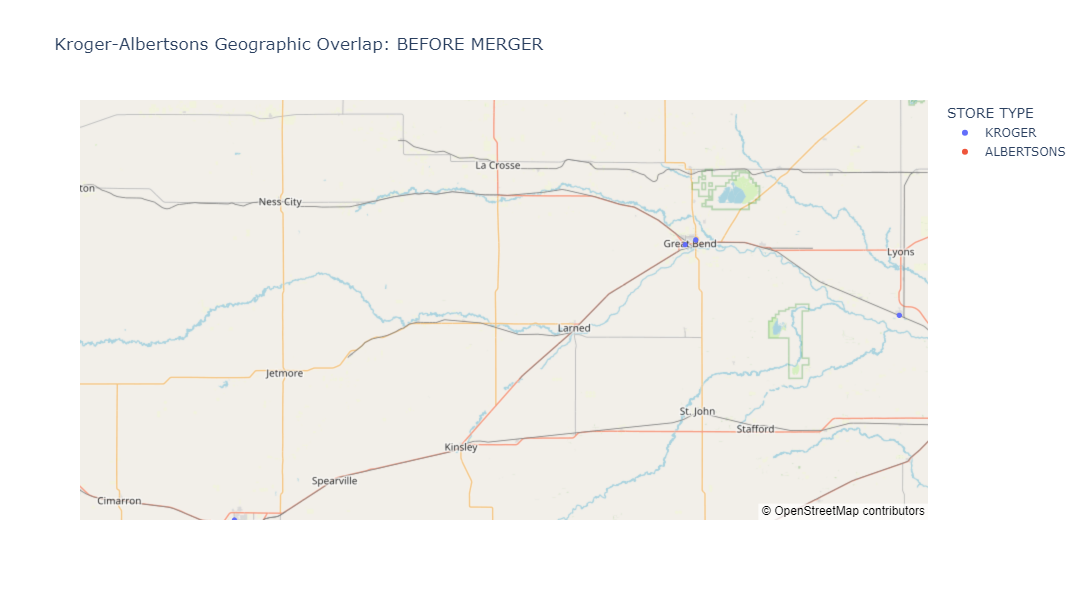

In [7]:
#scatterplot showing the locations of only Kroger and Albertsons before the merger  
px.scatter_mapbox(store_kr_alb, lat='LATITUDE', lon='LONGITUDE', color='STORE TYPE',
                            color_continuous_scale=["black", "purple", "red"],
                            animation_group= 'STORE TYPE',height = 600,
                            width = 1000, title= 'Kroger-Albertsons Geographic Overlap: BEFORE MERGER', mapbox_style="open-street-map")

The map above shows geographic overlap between the two brands in several areas: Seattle, Los Angeles, Denver, Dallas, Chicago, and Washington DC. 

In these cities, previously competing grocery stores will now be owned by the same company assuming that all Albertsons and Kroger grocery stores will remain open after the merger, resulting in the market share of Albertsons-Kroger to increase in these areas with significant overlap. 

The downside is that it would make it more difficult for other grocery stores with smaller market shares in these regions to compete with Albertsons-Kroger.

## Kroger-Albertsons Combined Stores

# AFTER MERGER

In [8]:
#newdf with Merged Kroger - Albertsons

store_kr_alb['STORE TYPE MERGED'] = store_kr_alb['STORE TYPE'].replace(['KROGER', 'ALBERTSONS'], 'KROGER-ALBERTSONS')

store_kr_alb.head()


COMPANY       ADDRESS LINE 1           CITY STATE  ZIPCODE    ZIP4  \
3        KROGER       1600 S OHIO ST   MARTINSVILLE    IN    46151  3317.0   
4   FOOD 4 LESS   2420 COTTONWOOD DR      EL CENTRO    CA    92243  1604.0   
5        KROGER    301 E MCKINLEY RD         OTTAWA    IL    61350  4805.0   
41       RALPHS  42150 WASHINGTON ST  BERMUDA DUNES    CA    92203  9611.0   
49         VONS    78271 HIGHWAY 111      LA QUINTA    CA    92253  2063.0   

    COUNTY CODE  AREA CODE  IDCODE LOCATION EMPLOYEE SIZE CODE  \
3         109.0        765       2                           F   
4          25.0        760       2                           E   
5          99.0        815       2                           E   
41         65.0        760       2                           E   
49         65.0        760       2                           D   

   LOCATION SALES VOLUME CODE  PRIMARY SIC CODE SIC6_DESCRIPTIONS  \
3                           G            541105    GROCERS-RETAIL   
4                           F            541105    GROCERS-RETAIL   
5                           F            541105    GROCERS-RETAIL   
41                          G            541105    GROCERS-RETAIL   
49                          F            541105    GROCERS-RETAIL   

    PRIMARY NAICS CODE                                NAICS8 DESCRIPTIONS  \
3           44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
4           44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
5           44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
41          44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   
49          44511003.0  SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS   

    SIC CODE          SIC6_DESCRIPTIONS (SIC)  SIC CODE 1  \
3        NaN                              NaN         NaN   
4        NaN                              NaN         NaN   
5        NaN                              NaN         NaN   
41  554101.0  SERVICE STATIONS-GASOLINE & OIL    591205.0   
49  546102.0                    BAKERS-RETAIL    599201.0   

   SIC6_DESCRIPTIONS (SIC1)  SIC CODE 2 SIC6_DESCRIPTIONS(SIC2)  SIC CODE 3  \
3                       NaN         NaN                     NaN         NaN   
4                       NaN         NaN                     NaN         NaN   
5                       NaN         NaN                     NaN         NaN   
41               PHARMACIES         NaN                     NaN         NaN   
49          FLORISTS-RETAIL    591205.0              PHARMACIES    592102.0   

   SIC6_DESCRIPTIONS(SIC3)  SIC CODE 4 SIC6_DESCRIPTIONS(SIC4)  \
3                      NaN         NaN                     NaN   
4                      NaN         NaN                     NaN   
5                      NaN         NaN                     NaN   
41                     NaN         NaN                     NaN   
49          LIQUORS-RETAIL         NaN                     NaN   

    ARCHIVE VERSION YEAR  YELLOW PAGE CODE  EMPLOYEE SIZE (5) - LOCATION  \
3                   2022           39106.0                         102.0   
4                   2022           39106.0                          70.0   
5                   2022           39106.0                          70.0   
41                  2022           39106.0                          75.0   
49                  2022           39106.0                          48.0   

    SALES VOLUME (9) - LOCATION  BUSINESS STATUS CODE  \
3                       21931.0                     2   
4                       14851.0                     2   
5                       14158.0                     2   
41                      21417.0                     2   
49                      13707.0                     2   

   INDUSTRY SPECIFIC FIRST BYTE  YEAR ESTABLISHED  OFFICE SIZE CODE  \
3                             P               NaN               NaN   
4                           ï¿½               NaN               NaN   
5           

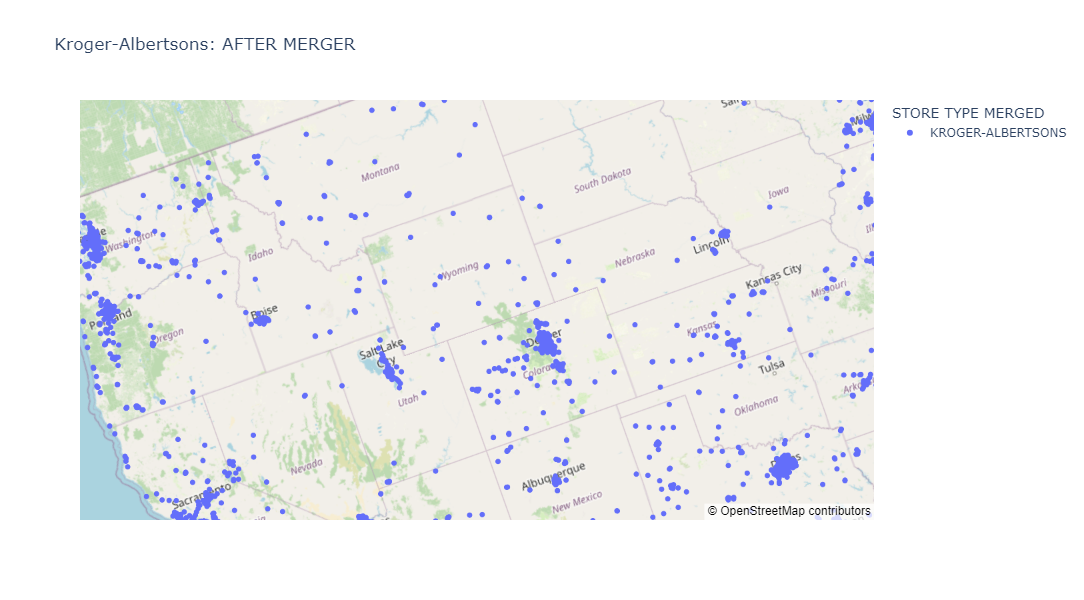

In [9]:
#scatterplot showing the locations of only Kroger and Albertsons after the merger  
px.scatter_mapbox(store_kr_alb, lat='LATITUDE', lon='LONGITUDE', color='STORE TYPE MERGED',
                            animation_group= 'STORE TYPE',height = 600,
                            width = 1000, title= 'Kroger-Albertsons: AFTER MERGER', mapbox_style="open-street-map")